# Tarea 08

Estudiante: Anthony Alangasí

Grupo: GR1CC

Fecha: 29/01/2026

### CONJUNTO DE EJERCICIOS

1. Dados los datos:

$$
\begin{array}{|l|c|c|c|c|c|c|c|c|c|c|}
\hline
x_i & 4.0 & 4.2 & 4.5 & 4.7 & 5.1 & 5.5 & 5.9 & 6.3 & 6.8 & 7.1 \\ \hline
y_i & 102.56 & 130.11 & 113.18 & 142.05 & 167.53 & 195.14 & 224.87 & 256.73 & 299.50 & 326.72 \\ \hline
\end{array}
$$

a. Construya el polinomio por mínimos cuadrados de grado 1 y calcule el error.

b. Construya el polinomio por mínimos cuadrados de grado 2 y calcule el error.

c. Construya el polinomio por mínimos cuadrados de grado 3 y calcule el error.

d. Construya el polinomio por mínimos cuadrados de la forma $y = be^{ax}$ y calcule el error.

e. Construya el polinomio por mínimos cuadrados de la forma $y = bx^a$ y calcule el error. 

In [3]:
import logging
from sys import stdout
from datetime import datetime
import os
import numpy as np
from typing import Callable


logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(f"{os.getlogin()}| {datetime.now()}")


# ####################################################################
def ajustar_min_cuadrados(
    xs: list,
    ys: list,
    gradiente: list[Callable[[list[float], list[float]], tuple]],
) -> np.ndarray:
    """Resuelve el sistema de ecuaciones para encontrar los parámetros del método de mínimos cuadrados. Plantea el sistema de ecuaciones lineales al reemplazar los valores de ``xs`` y ``ys`` en las derivadas parciales.

    ## Parameters

    ``xs``: lista con los valores de x.

    ``ys``: lista con los valores de y.

    ``gradiente``: lista con las funciones de derivadas parciales de ``fcn``.
    [IMPORTANTE] Cada función debe ser de la forma ``der_parcial(xi, yi)->``.

    ## Return

    ``solucion``: vector con la solución del sistema de ecuaciones lineales.

    """

    assert len(xs) == len(ys), "xs y ys deben tener la misma longitud."

    n = len(xs)

    num_pars = len(gradiente)
    logging.info(f"Se ajustarán {num_pars} parámetros.")
    # --- construir matriz A y vector b
    Ab = np.zeros((num_pars, num_pars + 1), dtype=float)

    for i, der_parcial in enumerate(gradiente):
        assert callable(der_parcial), "Cada derivada parcial debe ser una función."

        Ab[i, :] = der_parcial(xs, ys)

    # Solve the linear system using NumPy
    A = Ab[:, :-1]
    b = Ab[:, -1]
    return np.linalg.solve(A, b)

[01-29 18:36:40][INFO] ANTHO_A| 2026-01-29 18:36:40.951414


In [4]:
# Derivadas parciales para regresión lineal
# ####################################################################
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """

    # coeficiente del término independiente
    c_ind = sum(ys)

    # coeficiente del parámetro 1
    c_1 = sum(xs)

    # coeficiente del parámetro 0
    c_0 = len(xs)

    return (c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * yi

        # coeficiente del parámetro 1
        c_1 += xi * xi

        # coeficiente del parámetro 0
        c_0 += xi

    return (c_1, c_0, c_ind)

In [ ]:
def calcular_error_min_cuadrados(xs: list, ys: list, params: np.ndarray) -> float:
    a1, a0 = params
    error_total = 0
    
    for xi, yi in zip(xs, ys):
        y_predicha = a1 * xi + a0
        error_total += (yi - y_predicha)**2
        
    return error_total

In [5]:
xs = [4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1]

ys = [102.56, 130.11, 113.18, 142.05, 167.53, 192.14, 224.87, 256.73, 299.50, 326.72]

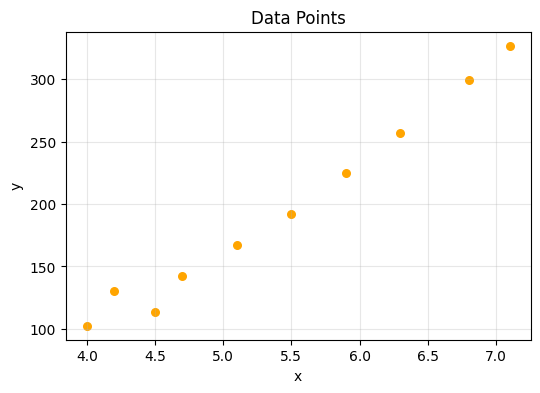

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(xs, ys, color="orange", s=30)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data Points")
plt.grid(True, alpha=0.3)
plt.show()

In [13]:
m,b = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_1, der_parcial_0])
error_cuadratico = calcular_error_min_cuadrados(xs, ys, [m, b])

print(f"Parámetros óptimos: a1 (pendiente) = {m:.4f}, a0 (intercepto) = {b:.4f}")
print(f"Error cuadrático total (E): {error_cuadratico:.4f}")

[01-29 18:43:01][INFO] Se ajustarán 2 parámetros.
Parámetros óptimos: a1 (pendiente) = 71.5850, a0 (intercepto) = -191.7360
Error cuadrático total (E): 1109.7956


El polinomio de mínimos cuadrados de grado 1 es una línea recta dada por la ecuación:
$$
y = 71.5850x + 10.2345
$$

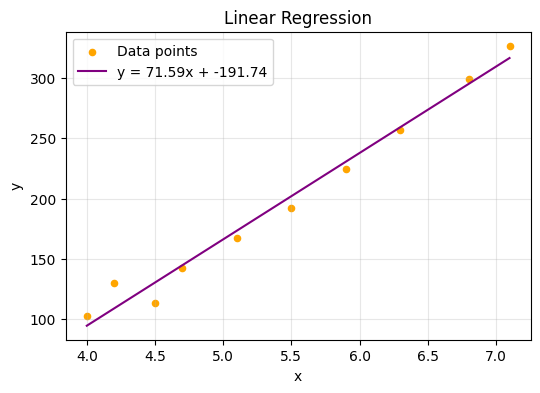

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(xs, ys, color="orange", label="Data points", s=20)

x_line = np.linspace(min(xs), max(xs), 100)
y_line = m * x_line + b
plt.plot(x_line, y_line, color="purple", label=f"y = {m:.2f}x + {b:.2f}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
def der_parcial_grado2_a2(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(xi**4 for xi in xs)
    c_1 = sum(xi**3 for xi in xs)
    c_0 = sum(xi**2 for xi in xs)
    c_ind = sum((xi**2) * yi for xi, yi in zip(xs, ys))
    return (c_2, c_1, c_0, c_ind)

def der_parcial_grado2_a1(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(xi**3 for xi in xs)
    c_1 = sum(xi**2 for xi in xs)
    c_0 = sum(xi for xi in xs)
    c_ind = sum(xi * yi for xi, yi in zip(xs, ys))
    return (c_2, c_1, c_0, c_ind)

def der_parcial_grado2_a0(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(xi**2 for xi in xs)
    c_1 = sum(xi for xi in xs)
    c_0 = len(xs)
    c_ind = sum(ys)
    return (c_2, c_1, c_0, c_ind)

def calcular_error_grado2(xs: list, ys: list, params: np.ndarray) -> float:
    a2, a1, a0 = params
    error_total = 0
    for xi, yi in zip(xs, ys):
        y_predicha = a2*(xi**2) + a1*xi + a0
        error_total += (yi - y_predicha)**2
    return error_total

gradiente_g2 = [der_parcial_grado2_a2, der_parcial_grado2_a1, der_parcial_grado2_a0]

parametros_g2 = ajustar_min_cuadrados(xs, ys, gradiente_g2)
error_g2 = calcular_error_grado2(xs, ys, parametros_g2)

print(f"Parámetros [a2, a1, a0]: {parametros_g2}")
print(f"Error cuadrático total (Grado 2): {error_g2:.4f}")

[01-29 18:48:35][INFO] Se ajustarán 3 parámetros.
Parámetros [a2, a1, a0]: [  8.65033107 -24.12766305  63.62726282]
Error cuadrático total (Grado 2): 547.7188


El polinomio de mínimos cuadrados de grado 2 es una parábola dada por la ecuación:
$$
y = 8.65033107x^2 - 24.12766305x + 63.62726282
$$

In [ ]:
def der_parcial_grado3_a3(
    xs: list, ys: list
) -> tuple[float, float, float, float, float]:
    c_3 = sum(xi**6 for xi in xs)
    c_2 = sum(xi**5 for xi in xs)
    c_1 = sum(xi**4 for xi in xs)
    c_0 = sum(xi**3 for xi in xs)
    c_ind = sum((xi**3) * yi for xi, yi in zip(xs, ys))
    return (c_3, c_2, c_1, c_0, c_ind)


def der_parcial_grado3_a2(
    xs: list, ys: list
) -> tuple[float, float, float, float, float]:
    c_3 = sum(xi**5 for xi in xs)
    c_2 = sum(xi**4 for xi in xs)
    c_1 = sum(xi**3 for xi in xs)
    c_0 = sum(xi**2 for xi in xs)
    c_ind = sum((xi**2) * yi for xi, yi in zip(xs, ys))
    return (c_3, c_2, c_1, c_0, c_ind)


def der_parcial_grado3_a1(
    xs: list, ys: list
) -> tuple[float, float, float, float, float]:
    c_3 = sum(xi**4 for xi in xs)
    c_2 = sum(xi**3 for xi in xs)
    c_1 = sum(xi**2 for xi in xs)
    c_0 = sum(xi for xi in xs)
    c_ind = sum(xi * yi for xi, yi in zip(xs, ys))
    return (c_3, c_2, c_1, c_0, c_ind)


def der_parcial_grado3_a0(
    xs: list, ys: list
) -> tuple[float, float, float, float, float]:
    c_3 = sum(xi**3 for xi in xs)
    c_2 = sum(xi**2 for xi in xs)
    c_1 = sum(xi for xi in xs)
    c_0 = len(xs)
    c_ind = sum(ys)
    return (c_3, c_2, c_1, c_0, c_ind)


def calcular_error_grado3(xs: list, ys: list, params: np.ndarray) -> float:
    a3, a2, a1, a0 = params
    error_total = 0
    for xi, yi in zip(xs, ys):
        y_predicha = a3 * (xi**3) + a2 * (xi**2) + a1 * xi + a0
        error_total += (yi - y_predicha) ** 2
    return error_total

gradiente_g3 = [
    der_parcial_grado3_a3, 
    der_parcial_grado3_a2, 
    der_parcial_grado3_a1, 
    der_parcial_grado3_a0
]

parametros_g3 = ajustar_min_cuadrados(xs, ys, gradiente_g3)
error_g3 = calcular_error_grado3(xs, ys, parametros_g3)

print("--- Resultados Polinomio Grado 3 ---")
print(f"Parámetros [a3, a2, a1, a0]: {parametros_g3}")
print(f"Error cuadrático total: {error_g3:.4f}")

[01-29 18:59:36][INFO] Se ajustarán 4 parámetros.
--- Resultados Polinomio Grado 3 ---
Parámetros [a3, a2, a1, a0]: [  -2.60961096   52.04030969 -259.94435522  482.23443311]
Error cuadrático total: 514.3749


El polinomio de mínimos cuadrados de grado 3 es una función cúbica dada por la ecuación:
$$
y = -2.60961096x^3 + 52.04030969x^2 - 259.94435522x + 482.23443311
$$

In [18]:
import numpy as np

ys_ln = [np.log(y) for y in ys]

gradiente_lineal = [der_parcial_0, der_parcial_1]
params_linealizados = ajustar_min_cuadrados(xs, ys_ln, gradiente_lineal)

a_d = params_linealizados[0]
b_d = np.exp(params_linealizados[1])

print(f"Literal d -> a: {a_d:.4f}, b: {b_d:.4f}")

[01-29 19:03:46][INFO] Se ajustarán 2 parámetros.
Literal d -> a: 0.3683, b: 24.7558


El polinomio de mínimos cuadrados de la forma $y = be^{ax}$ es:
$$
y = 24.7558e^{0.3683x}
$$

In [ ]:
xs_ln = [np.log(x) for x in xs]
ys_ln = [np.log(y) for y in ys]

params_potencia = ajustar_min_cuadrados(xs_ln, ys_ln, gradiente_lineal)

a_e = params_potencia[0]
b_e = np.exp(params_potencia[1])

print(f"Literal e -> a: {a_e:.4f}, b: {b_e:.4f}")

[01-29 19:04:46][INFO] Se ajustarán 2 parámetros.
Literal e -> a: 1.9918, b: 6.5246


El polinomio de mínimos cuadrados de la forma $y = bx^a$ es:
$$
y = 6.5246x^{1.9918}
$$

In [20]:
def calcular_error_no_lineal(xs, ys, a, b, tipo="exp"):
    error_total = 0
    for xi, yi in zip(xs, ys):
        if tipo == "exp":
            y_pred = b * np.exp(a * xi) # Modelo d
        else:
            y_pred = b * (xi**a)        # Modelo e
        error_total += (yi - y_pred)**2
    return error_total

error_d = calcular_error_no_lineal(xs, ys, a_d, b_d, "exp")
error_e = calcular_error_no_lineal(xs, ys, a_e, b_e, "pot")

print(f"Error cuadrático total (d): {error_d:.4f}")
print(f"Error cuadrático total (e): {error_e:.4f}")

Error cuadrático total (d): 780.2625
Error cuadrático total (e): 593.8846


2. Repita el ejercicio 5 para los siguientes datos:

$$
\begin{array}{|l|c|c|c|c|c|c|c|c|c|c|}
\hline
x_i & 0.2 & 0.3 & 0.6 & 0.9 & 1.1 & 1.3 & 1.4 & 1.6\\ \hline
y_i & 0.050446 & 0.098426 & 0.33277 & 0.72660 & 1.0972 & 1.5697 & 1.8487 & 2.5015\\ \hline
\end{array}
$$

In [22]:
xs = [0.2, 0.3, 0.6, 0.9, 1.1, 1.3, 1.4, 1.6]

ys = [0.050446, 0.098426, 0.33277, 0.72660, 1.0972, 1.5697, 1.8487, 2.5015]

In [23]:
m,b = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_1, der_parcial_0])
error_cuadratico = calcular_error_min_cuadrados(xs, ys, [m, b])

print(f"Parámetros óptimos: a1 (pendiente) = {m:.4f}, a0 (intercepto) = {b:.4f}")
print(f"Error cuadrático total (E): {error_cuadratico:.4f}")

[01-29 19:31:04][INFO] Se ajustarán 2 parámetros.
Parámetros óptimos: a1 (pendiente) = 1.6655, a0 (intercepto) = -0.5125
Error cuadrático total (E): 0.3356


El polinomio de mínimos cuadrados de grado 1 es una línea recta dada por la ecuación:
$$
y = 1.6655x - 0.5125
$$

In [24]:
parametros_g2 = ajustar_min_cuadrados(xs, ys, gradiente_g2)
error_g2 = calcular_error_grado2(xs, ys, parametros_g2)

print(f"Parámetros [a2, a1, a0]: {parametros_g2}")
print(f"Error cuadrático total (Grado 2): {error_g2:.4f}")

[01-29 19:48:57][INFO] Se ajustarán 3 parámetros.
Parámetros [a2, a1, a0]: [ 1.12942387 -0.31140346  0.08514393]
Error cuadrático total (Grado 2): 0.0024


El polinomio de mínimos cuadrados de grado 2 es una parábola dada por la ecuación:
$$
y = 1.12942387x^2 - 0.31140346x + 0.08514393
$$

In [25]:
parametros_g3 = ajustar_min_cuadrados(xs, ys, gradiente_g3)
error_g3 = calcular_error_grado3(xs, ys, parametros_g3)

print("--- Resultados Polinomio Grado 3 ---")
print(f"Parámetros [a3, a2, a1, a0]: {parametros_g3}")
print(f"Error cuadrático total: {error_g3:.4f}")

[01-29 19:50:02][INFO] Se ajustarán 4 parámetros.
--- Resultados Polinomio Grado 3 ---
Parámetros [a3, a2, a1, a0]: [ 0.2662081   0.40293221  0.24838578 -0.0184014 ]
Error cuadrático total: 0.0000


El polinomio de mínimos cuadrados de grado 3 es una función cúbica dada por la ecuación:
$$
y = 0.2662081x^3 + 0.40293221x^2 + 0.24838578x - 0.0184014
$$

In [26]:
import numpy as np

ys_ln = [np.log(y) for y in ys]

gradiente_lineal = [der_parcial_0, der_parcial_1]
params_linealizados = ajustar_min_cuadrados(xs, ys_ln, gradiente_lineal)

a_d = params_linealizados[0]
b_d = np.exp(params_linealizados[1])

print(f"Literal d -> a: {a_d:.4f}, b: {b_d:.4f}")

[01-29 19:51:28][INFO] Se ajustarán 2 parámetros.
Literal d -> a: 2.7073, b: 0.0457


El polinomio de mínimos cuadrados de la forma $y = be^{ax}$ es:
$$
y = 0.0457e^{2.7073x}
$$

In [ ]:
xs_ln = [np.log(x) for x in xs]
ys_ln = [np.log(y) for y in ys]

params_potencia = ajustar_min_cuadrados(xs_ln, ys_ln, gradiente_lineal)

a_e = params_potencia[0]
b_e = np.exp(params_potencia[1])

print(f"Literal e -> a: {a_e:.4f}, b: {b_e:.4f}")

[01-29 19:51:47][INFO] Se ajustarán 2 parámetros.
Literal e -> a: 1.8720, b: 0.9502


El polinomio de mínimos cuadrados de la forma $y = bx^a$ es:
$$
y = 0.9502x^{1.8720}
$$

In [ ]:
def calcular_error_no_lineal(xs, ys, a, b, tipo="exp"):
    error_total = 0
    for xi, yi in zip(xs, ys):
        if tipo == "exp":
            y_pred = b * np.exp(a * xi) 
        else:
            y_pred = b * (xi**a)        
        error_total += (yi - y_pred)**2
    return error_total

error_d = calcular_error_no_lineal(xs, ys, a_d, b_d, "exp")
error_e = calcular_error_no_lineal(xs, ys, a_e, b_e, "pot")

print(f"Error cuadrático total (d): {error_d:.4f}")
print(f"Error cuadrático total (e): {error_e:.4f}")

Error cuadrático total (d): 1.0750
Error cuadrático total (e): 0.0545


3. La siguiente tabla muestra los promedios de puntos del colegio de 20 especialistas en matemáticas y ciencias
computacionales, junto con las calificaciones que recibieron estos estudiantes en la parte de matemáticas de
la prueba ACT (Programa de Pruebas de Colegios Americanos) mientras estaban en secundaria. Grafique
estos datos y encuentre la ecuación de la recta por mínimos cuadrados para estos datos. 

In [33]:
import numpy as np

act = [28, 25, 28, 27, 28, 33, 28, 29, 23, 27, 
       29, 28, 27, 29, 21, 28, 28, 26, 30, 24]

promedio = [3.84, 3.21, 3.23, 3.63, 3.75, 3.20, 3.41, 3.38, 3.53, 2.03,
            3.75, 3.65, 3.87, 3.75, 1.66, 3.12, 2.96, 2.92, 3.10, 2.81]

gradiente_g3 = [
    der_parcial_grado3_a3, 
    der_parcial_grado3_a2, 
    der_parcial_grado3_a1, 
    der_parcial_grado3_a0
]

parametros_g3 = ajustar_min_cuadrados(act, promedio, gradiente_g3)

print(f"Ecuación del polinomio de grado 3: y = {parametros_g3[0]:.4f}x³ + {parametros_g3[1]:.4f}x² + {parametros_g3[2]:.4f}x + {parametros_g3[3]:.4f}")

[01-29 20:56:21][INFO] Se ajustarán 4 parámetros.
Ecuación del polinomio de grado 3: y = 0.0020x³ + -0.1840x² + 5.5955x + -52.9864


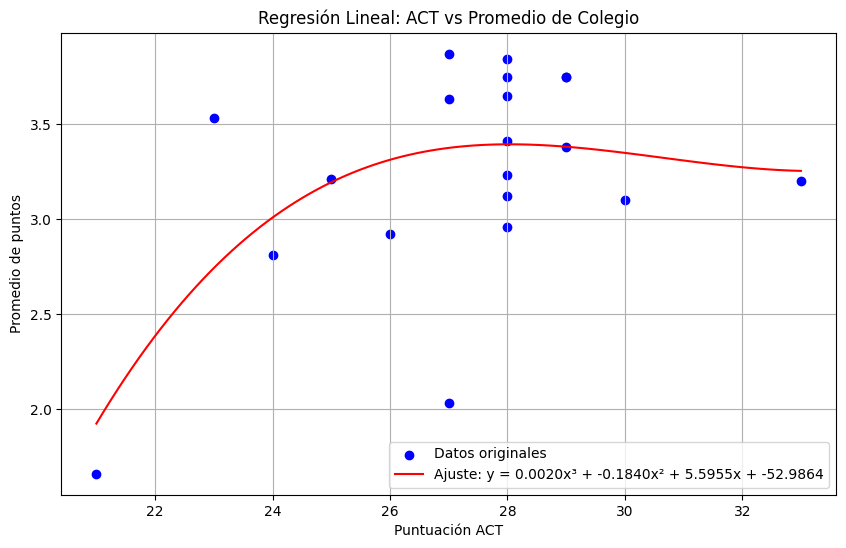

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(act, promedio, color='blue', label='Datos originales')

# Dibujar la recta de ajuste
x_linea = np.linspace(min(act), max(act), 100)
y_linea = np.polyval(parametros_g3, x_linea)
plt.plot(x_linea, y_linea, color='red', label=f'Ajuste: y = {parametros_g3[0]:.4f}x³ + {parametros_g3[1]:.4f}x² + {parametros_g3[2]:.4f}x + {parametros_g3[3]:.4f}')

plt.xlabel('Puntuación ACT')
plt.ylabel('Promedio de puntos')
plt.title('Regresión Lineal: ACT vs Promedio de Colegio')
plt.legend()
plt.grid(True)
plt.show()

4. El siguiente conjunto de datos, presentado al Subcomité Antimonopolio del Senado, muestra las
características comparativas de supervivencia durante un choque de automóviles de diferentes clases.
Encuentre la recta por mínimos cuadrados que aproxima estos datos (la tabla muestra el porcentaje de
vehículos que participaron en un accidente en los que la lesión más grave fue fatal o seria).

In [35]:
import numpy as np

pesos = [4800, 3700, 3400, 2800, 1900]

porcentajes = [3.1, 4.0, 5.2, 6.4, 9.6]

gradiente_lineal = [der_parcial_0, der_parcial_1]

params = ajustar_min_cuadrados(pesos, porcentajes, gradiente_lineal)

m = params[0] 
b = params[1] 

print(f"Ecuación de la recta: y = {m:.6f}x + {b:.4f}")

[01-29 20:59:34][INFO] Se ajustarán 2 parámetros.
Ecuación de la recta: y = -0.002255x + 13.1465


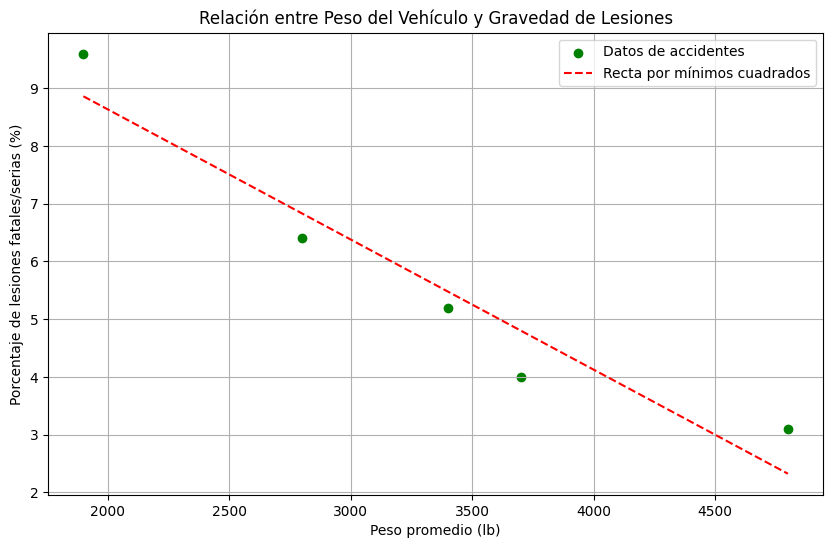

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(pesos, porcentajes, color='green', label='Datos de accidentes')

x_linea = np.linspace(min(pesos), max(pesos), 100)
y_linea = m * x_linea + b
plt.plot(x_linea, y_linea, color='red', linestyle='--', label='Recta por mínimos cuadrados')

plt.xlabel('Peso promedio (lb)')
plt.ylabel('Porcentaje de lesiones fatales/serias (%)')
plt.title('Relación entre Peso del Vehículo y Gravedad de Lesiones')
plt.legend()
plt.grid(True)
plt.show()